## KNN - Predict whether a email is a Spam or Not

In [1]:
# import necerssary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
with open("C:\\Users\\Admin\\Desktop\\ML CW\\spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)

Data_set = pd.read_csv("C:\\Users\\Admin\\Desktop\\ML CW\\spambase.data", header=None, names=labels +['spam']) 

Data_array=Data_set.values
# print(Data_array)
Data_set.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
print("No of rows in dataset before preprocessing : ", len(Data_set))

No of rows in dataset before preprocessing :  4601


### Finding the duplicates in the dataset

In [4]:
Data_set.duplicated().values.any()

True

In [5]:
Data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

### Dropping the duplicate values

In [6]:
Data_set.drop_duplicates(inplace=True)

In [7]:
print("No of rows in dataset after removing duplicates : ", len(Data_set))

No of rows in dataset after removing duplicates :  4210


### Finding the outliers in the dataset

<Figure size 10000x5000 with 0 Axes>

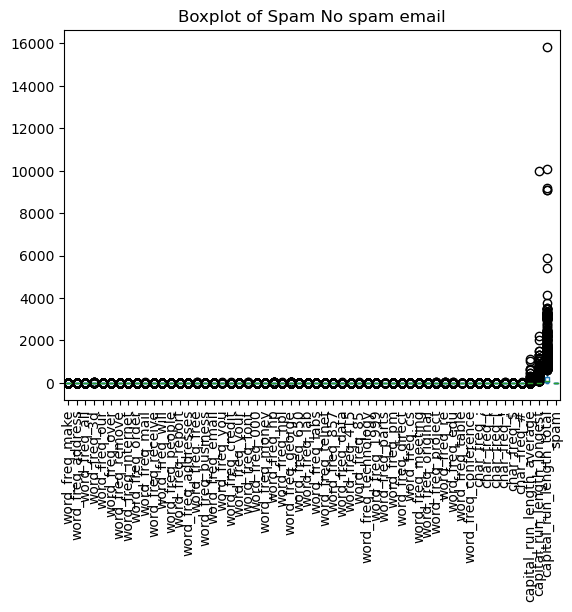

In [8]:
fig = plt.figure(figsize =(100, 50))
Data_set.plot.box(title='Boxplot of Spam No spam email',rot=90)

plt.show()

### Boxplot of capital_run_length_total

<AxesSubplot:xlabel='capital_run_length_total'>

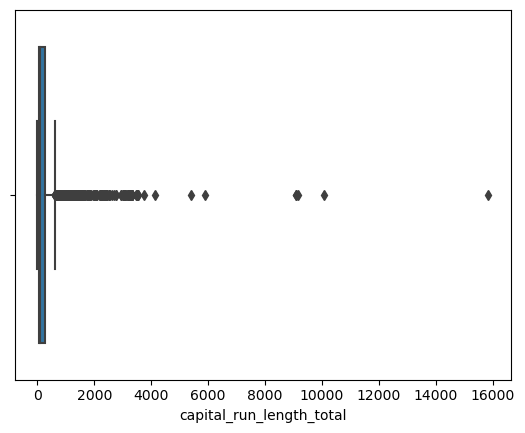

In [9]:
sn.boxplot(x = Data_set['capital_run_length_total'])

### Boxplot of capital_run_length_average

<AxesSubplot:xlabel='capital_run_length_average'>

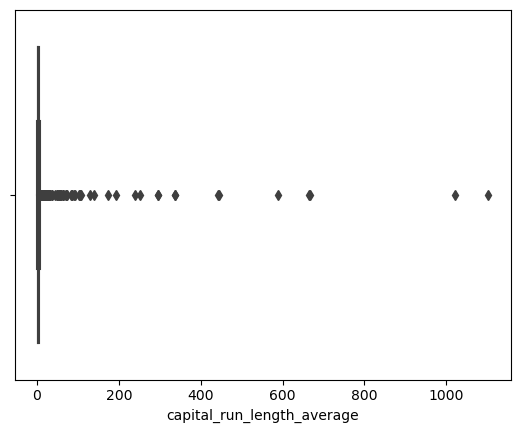

In [10]:
sn.boxplot(x = Data_set['capital_run_length_average'])

### Boxplot of capital_run_length_longest

<AxesSubplot:xlabel='capital_run_length_longest'>

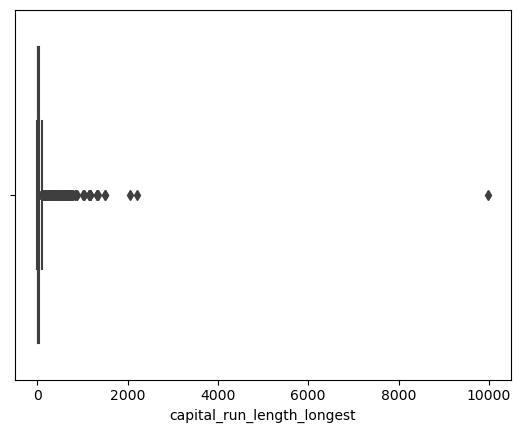

In [11]:
sn.boxplot(x = Data_set['capital_run_length_longest'])

### Making all the outliers as Null values from IQR technique

In [12]:
for x in ['capital_run_length_total','capital_run_length_longest','capital_run_length_average']:
    q75,q25 = np.percentile(Data_set.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Data_set.loc[Data_set[x] < min,x] = np.nan
    Data_set.loc[Data_set[x] > max,x] = np.nan

### Boxplot of capital_run_length_total without outliers

<AxesSubplot:xlabel='capital_run_length_total'>

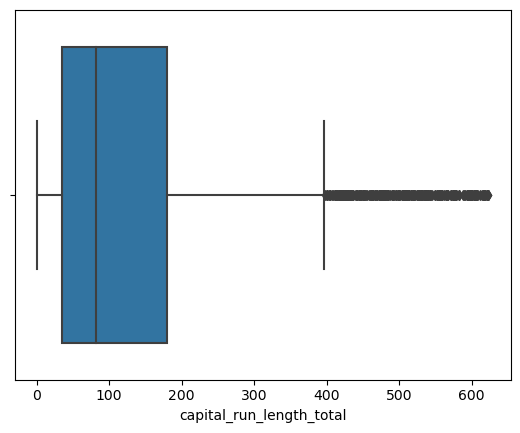

In [13]:
sn.boxplot(x = Data_set['capital_run_length_total'])

### Boxplot of capital_run_length_longest without outliers

<AxesSubplot:xlabel='capital_run_length_longest'>

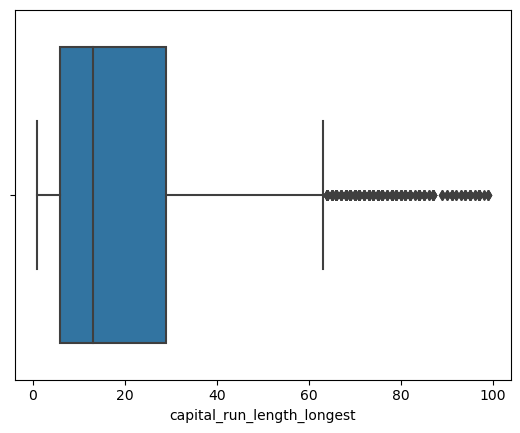

In [14]:
sn.boxplot(x = Data_set['capital_run_length_longest'])

### Boxplot of capital_run_length_average without outliers

<AxesSubplot:xlabel='capital_run_length_average'>

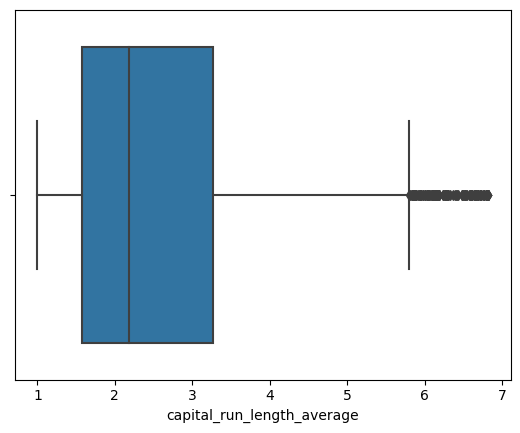

In [15]:
sn.boxplot(x = Data_set['capital_run_length_average'])

### Finding the null values in the dataset

In [16]:
Data_set.isna().sum().any()

True

In [17]:
Data_set.isna().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

### Removing all the Null values

In [18]:
# Drop all rows with NaN values
df2=Data_set.dropna()
df2=Data_set.dropna(axis=0)

# Reset index after drop
df2=Data_set.dropna().reset_index(drop=True)

Data_set = df2
df2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


### Removing the target column 

In [19]:
data=Data_set.drop(labels=['spam'], axis=1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0
1,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0
2,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0
3,0.0,0.00,0.00,0.0,1.85,0.0,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0
4,0.0,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0


In [20]:
print("No of rows in dataset after preprocessing : ", len(Data_set))

No of rows in dataset after preprocessing :  3446


### Summary of dataset before performing Standard Scaler

In [21]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.038328,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.326526,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000


### Kernel Density Plot

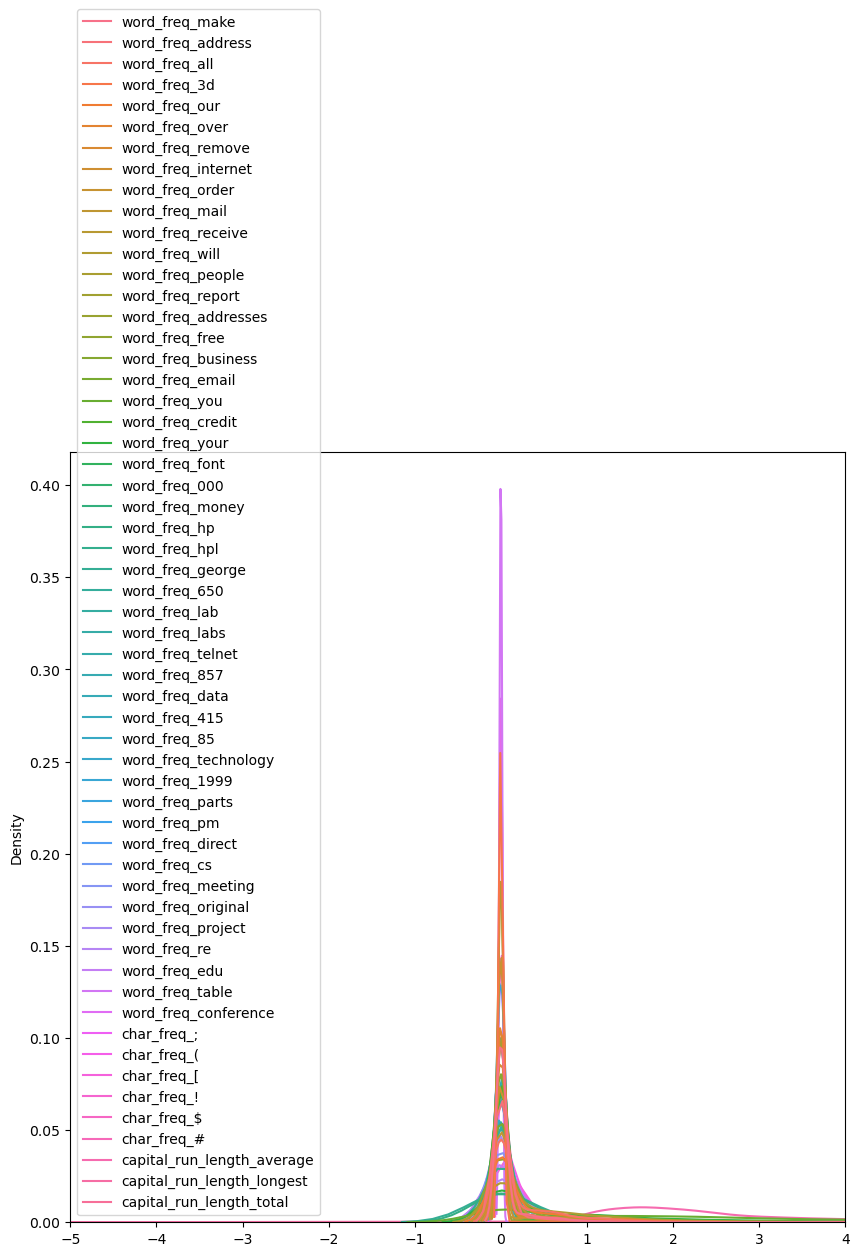

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data=data, ax=ax)
ax.set_xlim(-5, 4)
plt.show()

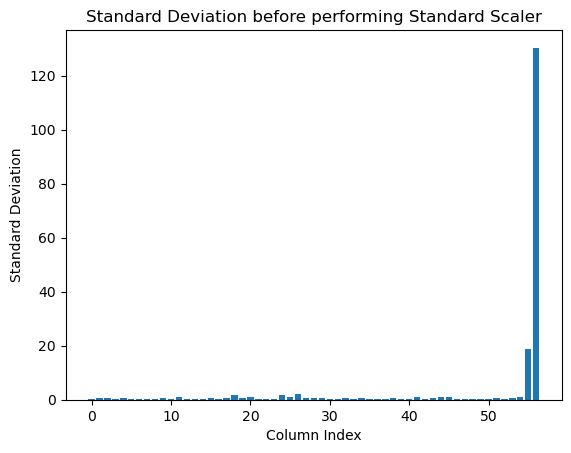

In [23]:
# Calculate the standard deviation of all columns
std_dev = data.std()

# Plot the standard deviation of all columns
plt.bar(range(len(std_dev)), std_dev)
plt.title("Standard Deviation before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()

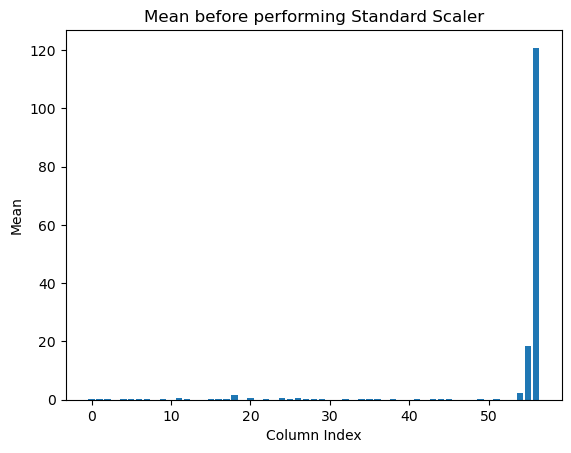

In [24]:
# Calculate the mean of all columns
mean = data.mean()

# Plot the mean of all columns
plt.bar(range(len(mean)), mean)
plt.title("Mean before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()

### Performing Standard Scaling for the dataset

In [25]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
df=pd.DataFrame(data=scaled_data, columns= data.columns)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.305981,1.153245,0.701909,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.685993,-0.266006,-0.07316,1.198328,2.265098,1.205883
1,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.042229,-0.153514,-0.121477,-0.266006,-0.07316,1.009960,1.145009,0.538555
2,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.050422,-0.153514,-0.123996,-0.266006,-0.07316,1.009960,1.145009,0.538555
3,-0.305981,-0.195373,-0.505857,-0.043154,2.196817,-0.303297,-0.263181,4.173219,-0.214868,-0.346011,...,-0.1174,-0.155346,0.310064,-0.153514,-0.294056,-0.266006,-0.07316,0.548074,-0.188431,-0.512294
4,-0.305981,-0.195373,-0.505857,-0.043154,2.296554,-0.303297,-0.263181,-0.228820,-0.214868,0.755535,...,-0.1174,-0.155346,-0.382233,-0.153514,-0.087465,0.012040,-0.07316,-0.595032,-0.775144,-0.067409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.694807,-0.195373,0.664166,-0.043154,-0.439092,0.799382,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,0.346932,-0.153514,-0.294056,-0.266006,-0.07316,-1.050038,-0.828481,-0.251499
3442,-0.305981,-0.195373,-0.505857,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.150619,-0.266006,-0.07316,-0.694806,-0.775144,-0.819111
3443,0.662524,-0.195373,0.060283,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,0.319285,2.337799,-0.153514,-0.294056,-0.266006,-0.07316,-0.824685,-0.668469,-0.021386
3444,2.793236,-0.195373,-0.505857,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.369944,-0.153514,-0.294056,-0.266006,-0.07316,-1.045737,-0.721806,-0.328204


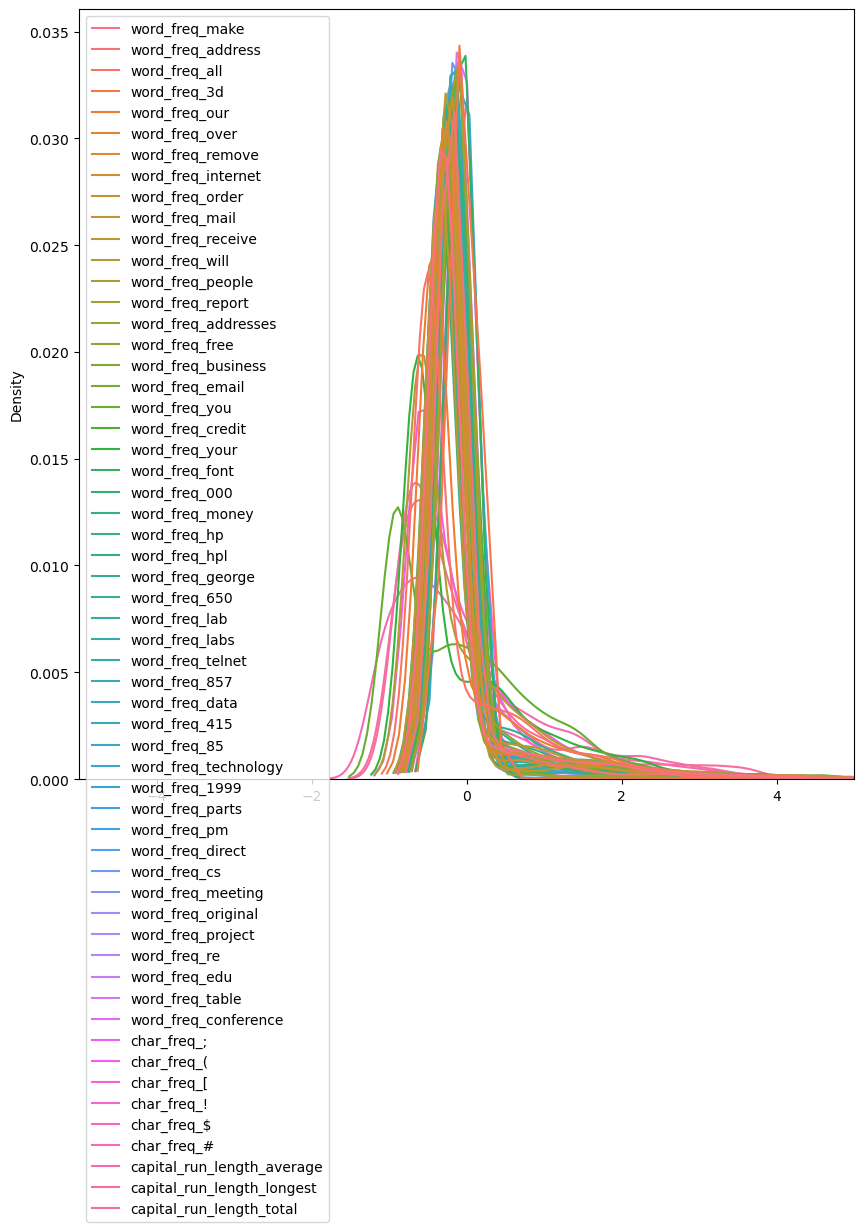

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data=df, ax=ax)
ax.set_xlim(-5, 5)

plt.show()

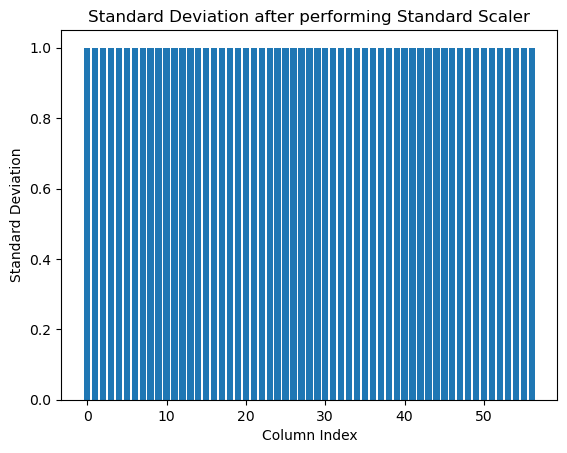

In [27]:
# Calculate the standard deviation of all columns
std_dev = df.std()

# Plot the standard deviation of all columns
plt.bar(range(len(std_dev)), std_dev)
plt.title("Standard Deviation after performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()

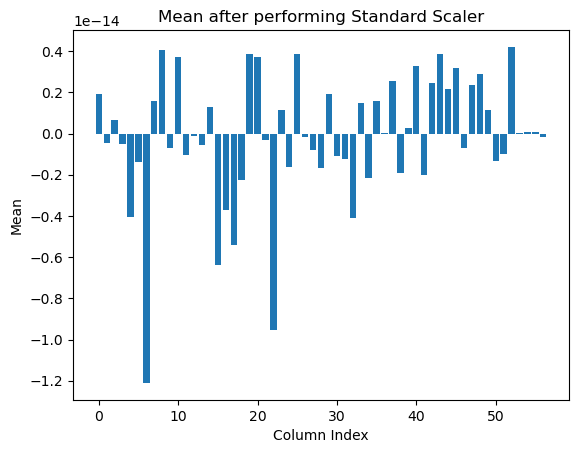

In [28]:
# Calculate the mean of all columns
mean = df.mean()

# Plot the mean of all columns
plt.bar(range(len(mean)), mean)
plt.title("Mean after performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()

### Summmary of dataset after performing Standard Scaling

In [29]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,...,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03
mean,1.906919e-15,-4.400459e-16,6.484785e-16,-5.201674e-16,-4.045146e-15,-1.406014e-15,-1.210717e-14,1.584065e-15,4.067150e-15,-7.056650e-16,...,2.352788e-15,2.911178e-15,1.163286e-15,-1.355787e-15,-9.867405e-16,4.202739e-15,3.410247e-17,8.189747e-17,6.437103e-17,-1.803871e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,...,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-1.172176e+00,-9.351566e-01,-9.188270e-01
25%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-7.348022e-01,-7.218063e-01,-6.887140e-01
50%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-3.330760e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-2.656043e-01,-3.484433e-01,-3.435446e-01
75%,-3.059813e-01,-1.953730e-01,1.735113e-01,-4.315372e-02,7.384151e-02,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,2.322319e-01,-1.535136e-01,4.493408e-03,-2.660056e-01,-7.316004e-02,4.698022e-01,2.382701e-01,2.624196e-01
max,1.435073e+01,2.989567e+01,9.118532e+00,5.239393e+01,1.380907e+01,2.061203e+01,2.015906e+01,2.620720e+01,2.340938e+01,1.877615e+01,...,3.051252e+01,2.024913e+01,2.101344e+01,3.607177e+01,4.061861e+01,3.064342e+01,4.306921e+01,3.835470e+00,4.238588e+00,3.852182e+00


# Performing PCA to the Dataset

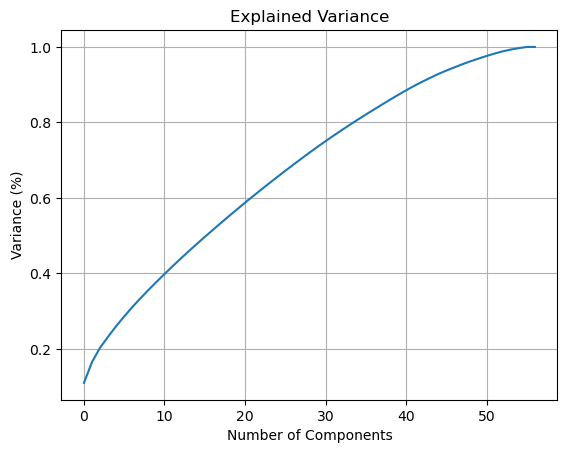

In [30]:
pca = PCA()

principalComponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Explained Variance')
plt.grid(True)
plt.show()

### Introducing the PCA components

In [31]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(df)

# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                         'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                         'PC41','PC42','PC43','PC44'])

### Dataset after performing PCA

In [32]:
principal_Df.head()
# principal_Df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-1.006857,1.802163,0.718545,0.075279,-0.217711,-0.058688,-1.193218,-0.852586,1.060496,0.868328,...,-0.125757,0.224750,0.053681,0.545266,-0.017696,0.164653,-0.110599,0.048681,-0.537634,-0.319802
1,-0.985097,1.538501,0.306278,-0.027331,-0.287028,-0.185415,-0.690252,0.207778,-0.356636,-0.197852,...,0.393972,-0.600739,0.333749,0.341546,-0.795243,0.293627,-0.134924,0.076915,0.327348,-0.536981
2,-0.986344,1.538185,0.305688,-0.026621,-0.287307,-0.184843,-0.690865,0.206908,-0.356909,-0.199399,...,0.393717,-0.599642,0.331265,0.344457,-0.796426,0.294939,-0.132614,0.076361,0.326718,-0.536569
3,-0.589457,-0.147104,-0.010536,0.294501,-0.673029,-0.411099,0.165598,0.738064,-1.293960,-0.064317,...,0.347536,-1.154170,1.044613,0.803992,-0.762079,1.203955,0.436922,-0.708131,0.288177,-0.544514
4,-1.147370,0.762926,-1.665192,0.687038,-0.063322,1.574491,-1.343798,-0.180217,-0.197333,-0.557408,...,1.897138,-0.336162,1.362045,-0.607562,0.109969,0.535804,0.402374,1.103561,-0.396212,0.418572


In [33]:
print(pca.explained_variance_)


[6.27759756 3.15144097 2.16980777 1.66017085 1.59211528 1.4654813
 1.40631189 1.31436071 1.26232654 1.22095836 1.20125141 1.1663959
 1.14251452 1.11554917 1.10046703 1.07449358 1.0581395  1.04459239
 1.03537502 1.01614022 1.01281701 0.99035313 0.97889349 0.95874681
 0.94603853 0.94151967 0.92774814 0.9108935  0.90401256 0.87347964
 0.86263579 0.83739402 0.81821771 0.8017603  0.79145751 0.76600178
 0.75748534 0.74453345 0.73422171 0.72291044 0.70098036 0.66683138
 0.62741602 0.59414501]


In [34]:
print(pca.components_)

[[-0.0362469  -0.0082901  -0.04087849 ...  0.00769074 -0.04498995
  -0.0378591 ]
 [ 0.10473603  0.06979258  0.10340064 ...  0.34752026  0.3771557
   0.29949304]
 [-0.08995206 -0.04322336 -0.09566584 ...  0.3190421   0.26996229
   0.31891352]
 ...
 [-0.20762128  0.28850565 -0.04370671 ... -0.11660802 -0.04359762
   0.12583398]
 [-0.02959192  0.266563    0.03175446 ... -0.01146759  0.01960267
   0.00201731]
 [-0.01437589  0.00577666  0.0745712  ... -0.02946954 -0.02691138
  -0.01103809]]


## Build the predictive model by appling K-Nearest Neighbors (KNN) algorithm

In [35]:
X = principal_Df.iloc[:,0:44].values
y = Data_set.iloc[:, 57].values

### Splitting the dataset into the Training set and Test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [37]:
# Fitting classifier to the Training set

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Classification Report

In [39]:
print('Classification Report : \n\n')
print(classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       450
           1       0.90      0.77      0.83       240

    accuracy                           0.89       690
   macro avg       0.89      0.86      0.87       690
weighted avg       0.89      0.89      0.89       690



### Accuracy of testing dataset

In [40]:
print("Accuracy score of email prediction using KNN : ",accuracy_score(y_pred,y_test)*100) 

Accuracy score of email prediction using KNN :  88.98550724637681


### Accuracy of training dataset

In [41]:
y_pred2 = classifier.predict(X_train)
print("Accuracy score of email prediction using KNN : ",accuracy_score(y_pred2,y_train)*100) 

Accuracy score of email prediction using KNN :  92.8156748911466


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Visualization

Text(113.9222222222222, 0.5, 'predicted class')

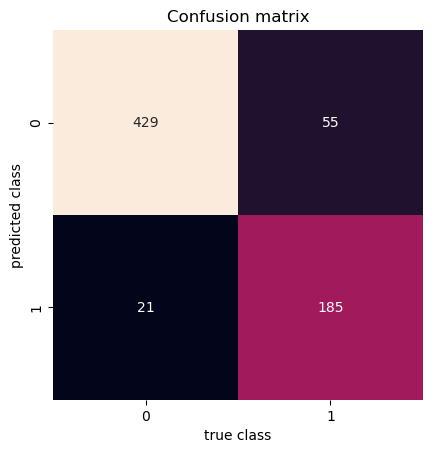

In [42]:
# Summary of the predictions made by the classifier

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')


True Positive: 429 mails are predicted as Not Spam and it is correct.

False Positive: 55 mails are predicted as Spam, but it is Not Spam.

True Negative: 185 mails are predicted as Spam, and it is correct.

False Negative: 21 mails are predicted as Spam, but it is Not spam.